In [1]:
import db_connect
import pandas
import matplotlib.pyplot as plt   # 資料視覺化套件

In [2]:
# 建立與MySQL的連線
my_connt_obj = db_connect.mysql_connect()
conn = my_connt_obj.connect()

In [3]:
# 取得資料庫的資料
df = pandas.read_sql("SELECT * FROM StockTransactionInfo WHERE TradeDate >'2021-09-01'", con=conn)
conn.close() # 關閉連線

In [4]:
# 檢查取得的資料
"""這樣只會顯示最後一個呼叫的資料，所以看不到.head()
df.head()   # 檢查頭五筆資料
df.tail()   # 檢查後五筆資料
"""
print(df.head() )
print(df.tail() )

    TradeDate  TranscationQty  TranscationAmount  TranscationCount     Taiex  \
0  2021-09-02      7363528319       354658918739           2367548  17319.76   
1  2021-09-03      7417361078       366252454304           2309735  17516.92   
2  2021-09-06      8125514641       380807908396           2551101  17495.30   
3  2021-09-07      6809125095       337806586675           2159870  17428.87   
4  2021-09-08      6716726562       325685541312           2204512  17270.49   

   ChangePoint          CreateTime  
0      -154.23 2021-09-10 22:55:16  
1       197.16 2021-09-10 22:55:16  
2       -21.62 2021-09-10 22:55:16  
3       -66.43 2021-09-10 22:55:16  
4      -158.38 2021-09-10 22:55:16  
    TradeDate  TranscationQty  TranscationAmount  TranscationCount     Taiex  \
2  2021-09-06      8125514641       380807908396           2551101  17495.30   
3  2021-09-07      6809125095       337806586675           2159870  17428.87   
4  2021-09-08      6716726562       325685541312         

Text(0.5, 1.0, 'Taiex')

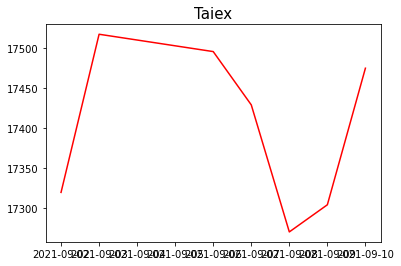

In [5]:
# 畫圖
plt.plot(df["TradeDate"], df["Taiex"],"r")  # (x軸資料, y軸資料, 線的顏色)
plt.title("Taiex", {"fontsize":15})     # 設定圖的標題及文字大小

Text(0.5, 1.0, 'TranscationAmount')

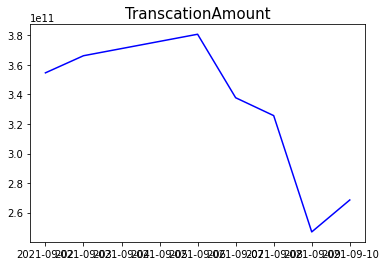

In [6]:
# 畫圖
plt.plot(df["TradeDate"], df["TranscationAmount"],"b")  # (x軸資料, y軸資料, 線的顏色)
plt.title("TranscationAmount", {"fontsize":15})     # 設定圖的標題及文字大小

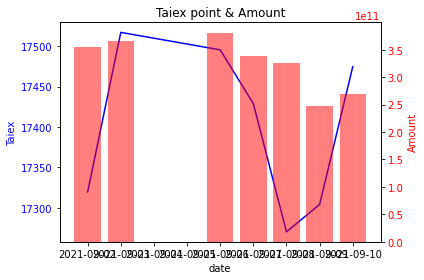

In [7]:
# 畫圖
# 在畫圖的地方，無法寫中文的名稱
fig, ax1 = plt.subplots()
plt.title("Taiex point & Amount")
plt.xlabel("date")
ax2 = ax1.twinx()

# 製作第一個圖表：折線圖
# blue：表示藍色，可以用「b」表示
ax1.set_ylabel("Taiex", color="blue")
ax1.plot(df["TradeDate"], df["Taiex"], color="blue", alpha=1)
ax1.tick_params(axis="y", labelcolor="blue")

# 製作第二個圖表：長條圖
# r：表示紅色，可以用「red表示」
ax2.set_ylabel("Amount", color="r")
ax2.bar(df["TradeDate"], df["TranscationAmount"], color="r", alpha=0.5) # alpha: 增加透明度
ax2.tick_params(axis="y", labelcolor="r")

fig.tight_layout()
plt.show()